In [9]:
%pylab inline

# plt.style.use('ggplot')

from CMPT import *
from tqdm import tnrange, tqdm_notebook
from joblib import delayed, Parallel
from sklearn import model_selection

colors = ['#7fc97f', '#beaed4', '#fdc086']

plt.rcParams['figure.figsize'] = (3 * 12.0, 1 * 8.0)

matplotlib.rc('font', family='sans-serif') 
# matplotlib.rc('font', serif='Helvetica neue') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 45})

plt.rc('font', family='Helvetica Neue')

Populating the interactive namespace from numpy and matplotlib


0.49279000000000006 0.526960303969603
0.46234299999999995 0.5156164383561643
0.5537329999999999 0.5348245175482451


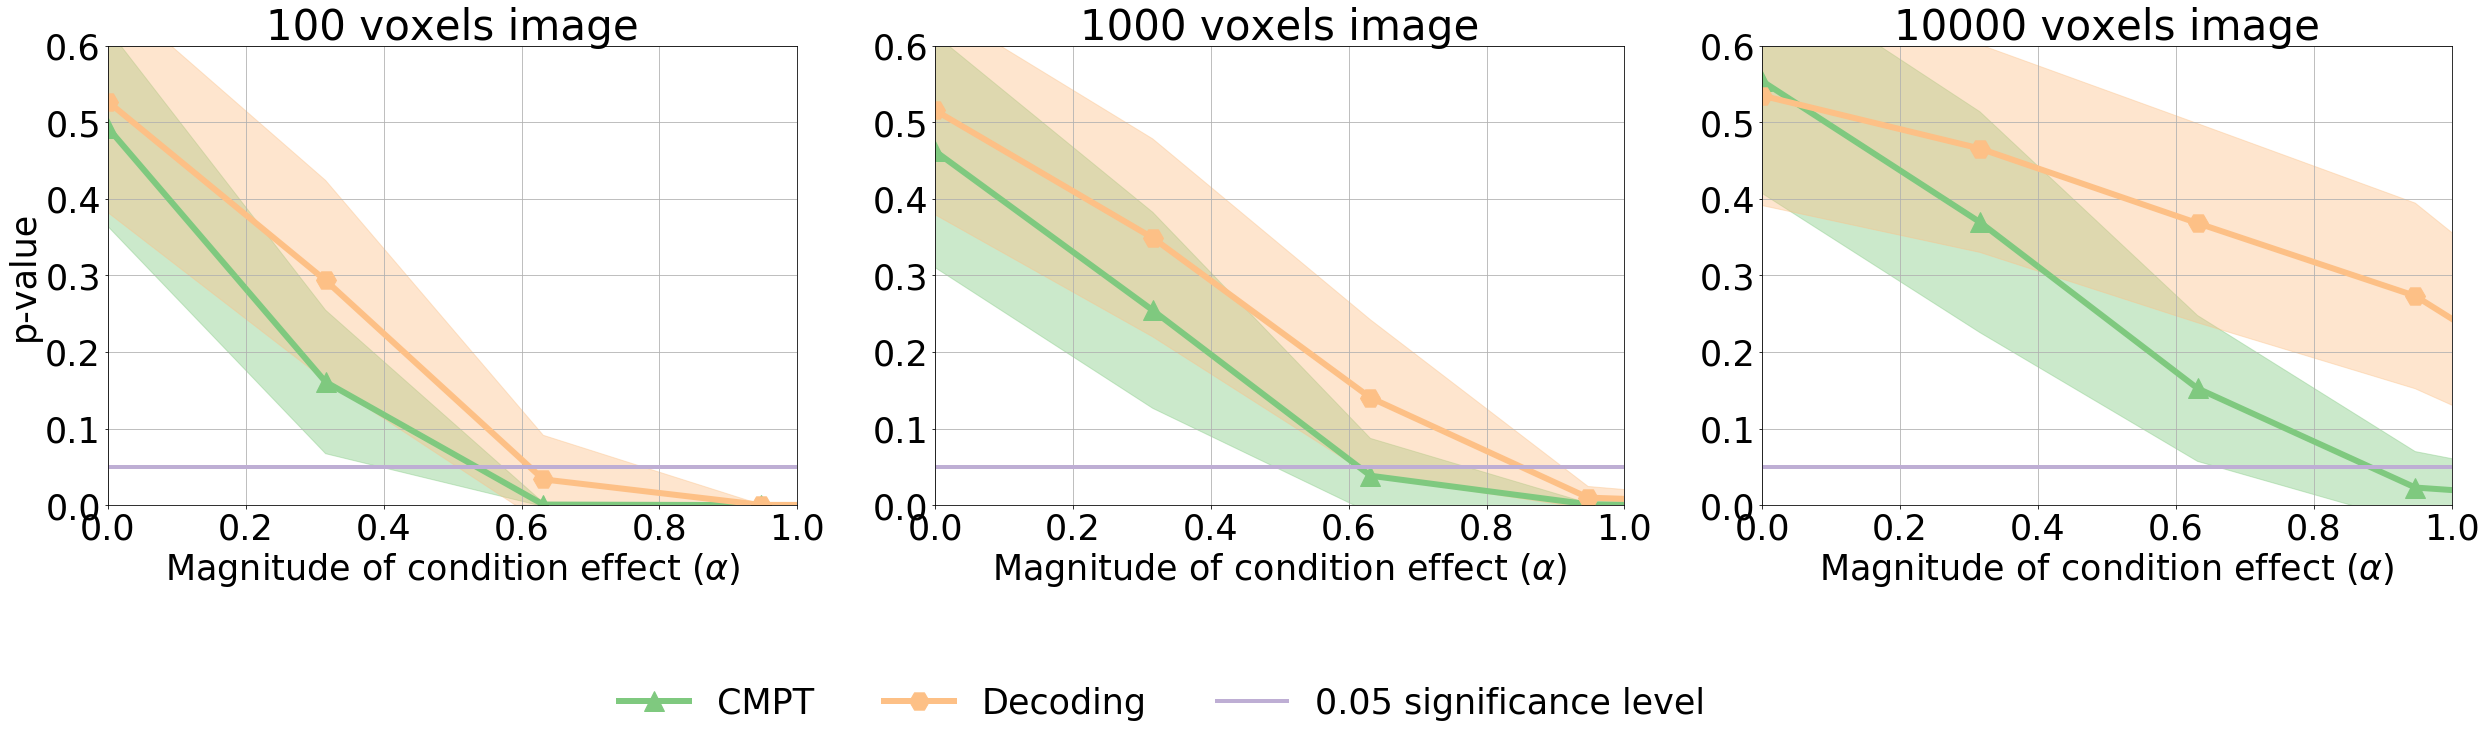

In [11]:
plt.rcParams['figure.figsize'] = (3 * 14.0, 1 * 11.0)
mpl.rcParams['font.size'] = 35

f, ax = plt.subplots(1, 3, sharey=False)
alpha_shaded = 0.4
lw=6
cmpt_threshold = []
decoding_threshold = []
all_dims = [100, 1000, 10000]
n_runs = 1
for i, width in enumerate(all_dims):
    width = str(width)
    alphas = np.load('data/alphas_%s.npy' % (width))
    pvals_cmpt = np.concatenate([np.load('data/cmpt_%s_%s.npy' % (width, run)) for run in range(n_runs)])
    pvals_decoding = np.concatenate([np.load('data/decoding_%s_%s.npy' % (width, run)) for run in range(n_runs)])
    print(pvals_cmpt[:, 0].mean(), pvals_decoding[:, 0].mean())

    ax[i].set_title('%s voxels image' % (int(width)))
    mean = pvals_cmpt.mean(0)
    err = pvals_cmpt.std(0)
    ax[i].fill_between(alphas, mean - err/2., mean + err/2., alpha=alpha_shaded, color=colors[0])
    cmpt = ax[i].plot(alphas, mean, lw=lw, color=colors[0], label='CMPT', marker='^', markersize=20)
    
    mean_decoding = pvals_decoding.mean(0)
    err_decoding = pvals_decoding.std(0)
    decoding = ax[i].plot(alphas, mean_decoding, color=colors[2], lw=lw, 
                          label='Decoding', marker='H', markersize=20)
    ax[i].fill_between(alphas, mean_decoding - err_decoding / 2., 
                     mean_decoding + err_decoding / 2., alpha=alpha_shaded, color=colors[2])
    significance = ax[i].plot(alphas, np.ones(alphas.size) * 0.05, lw=lw // 1.5, color=colors[1], label='0.05 significance level')
    ax[i].set_xlabel(r'Magnitude of condition effect (${\alpha}$)')
    ax[i].set_ylim((0, 0.6))
    ax[i].set_xlim((0, 1))
    ax[i].grid(True)

ax[0].set_ylabel('p-value')
plt.gcf().subplots_adjust(bottom=0.3)

plt.figlegend((cmpt[0], 
               decoding[0], 
               significance[0]), 
              ('CMPT','Decoding', 
               '0.05 significance level'),
              ncol=6,
              loc = (0.0, 0.0), 
              fancybox=False, 
              framealpha=0.5,
              frameon=False,
              bbox_to_anchor=[0.2, 0.01]
             )
plt.savefig('cmpt_vs_decoding.pdf', bbox_inches='tight')
plt.show()


In [13]:
pvals_cmpt = np.concatenate([np.load('data/cmpt_%s_%s.npy' % (100, run)) for run in range(n_runs)])
pvals_decoding = np.concatenate([np.load('data/decoding_%s_%s.npy' % (100, run)) for run in range(n_runs)])
pvals_decoding[:, 0].mean(), pvals_cmpt[:, 0].mean()

(0.526960303969603, 0.49279000000000006)

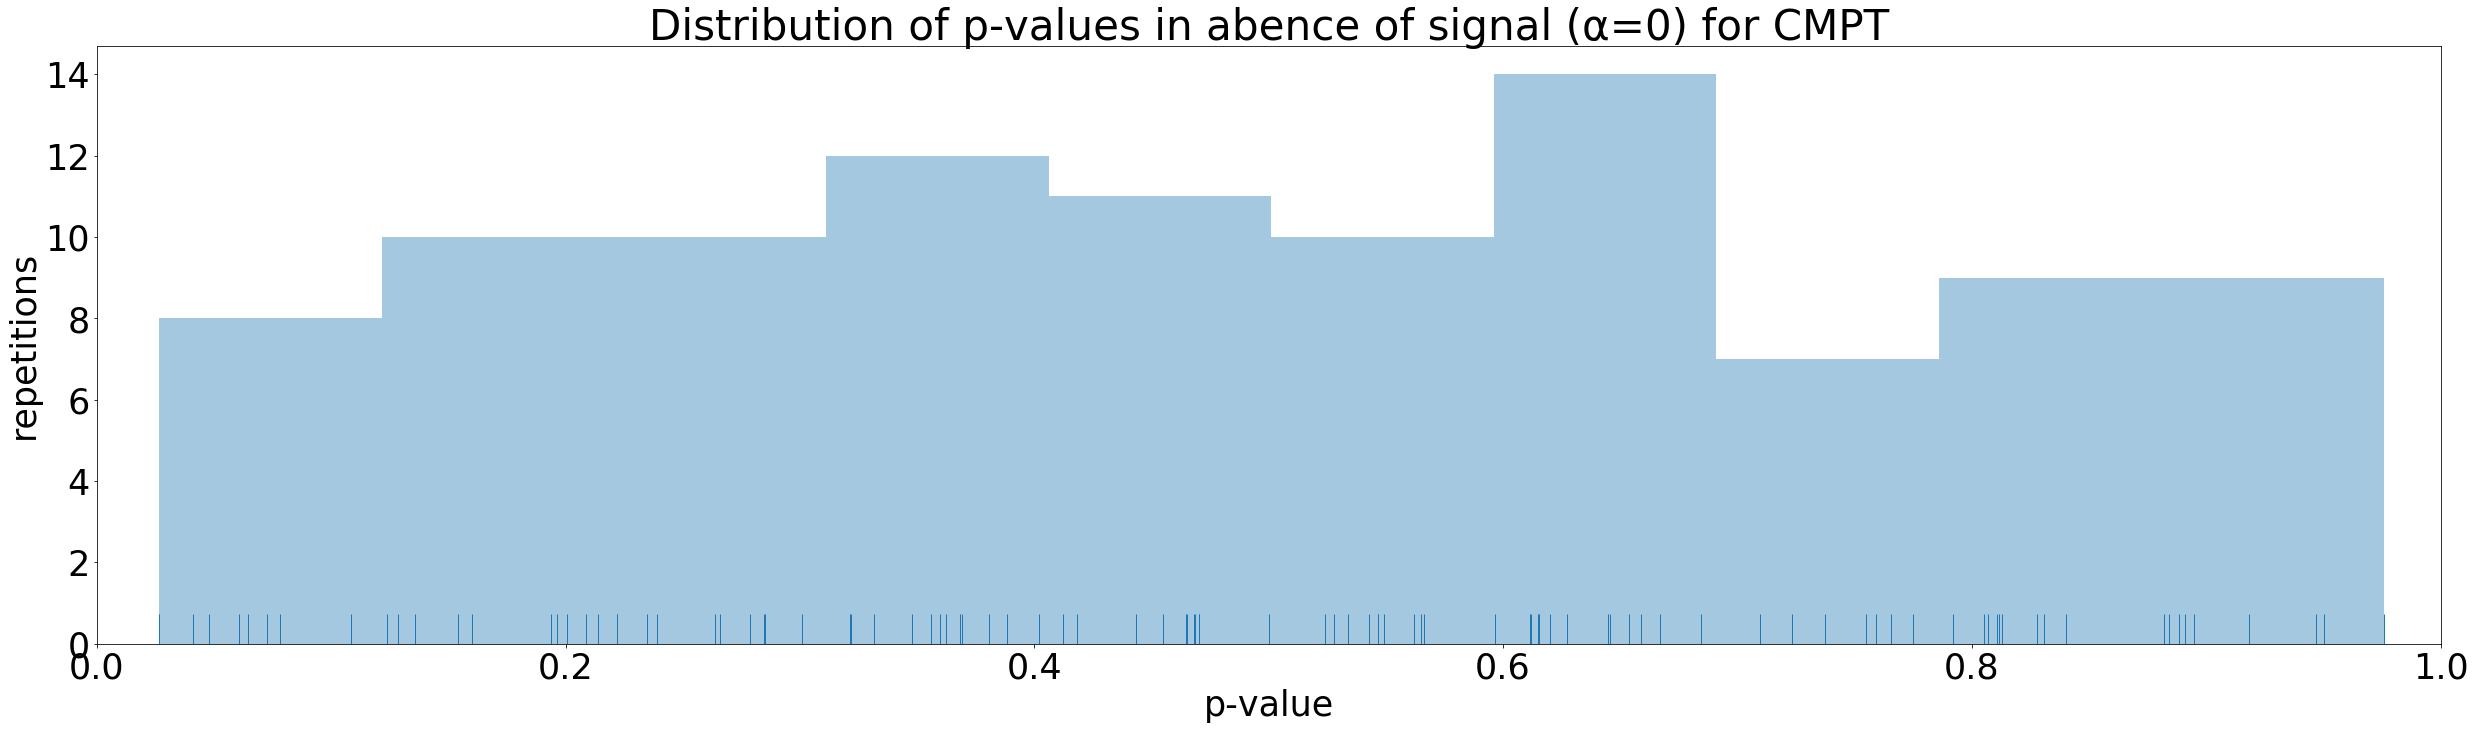

In [14]:
import seaborn as sns
sns.distplot(pvals_cmpt[:, 0], bins=10, kde=False, rug=True)
plt.title('Distribution of p-values in abence of signal (α=0) for CMPT')
plt.xlim((0, 1))
plt.xlabel('p-value')
plt.ylabel('repetitions')
plt.savefig('cmpt_pvals_dist.pdf')

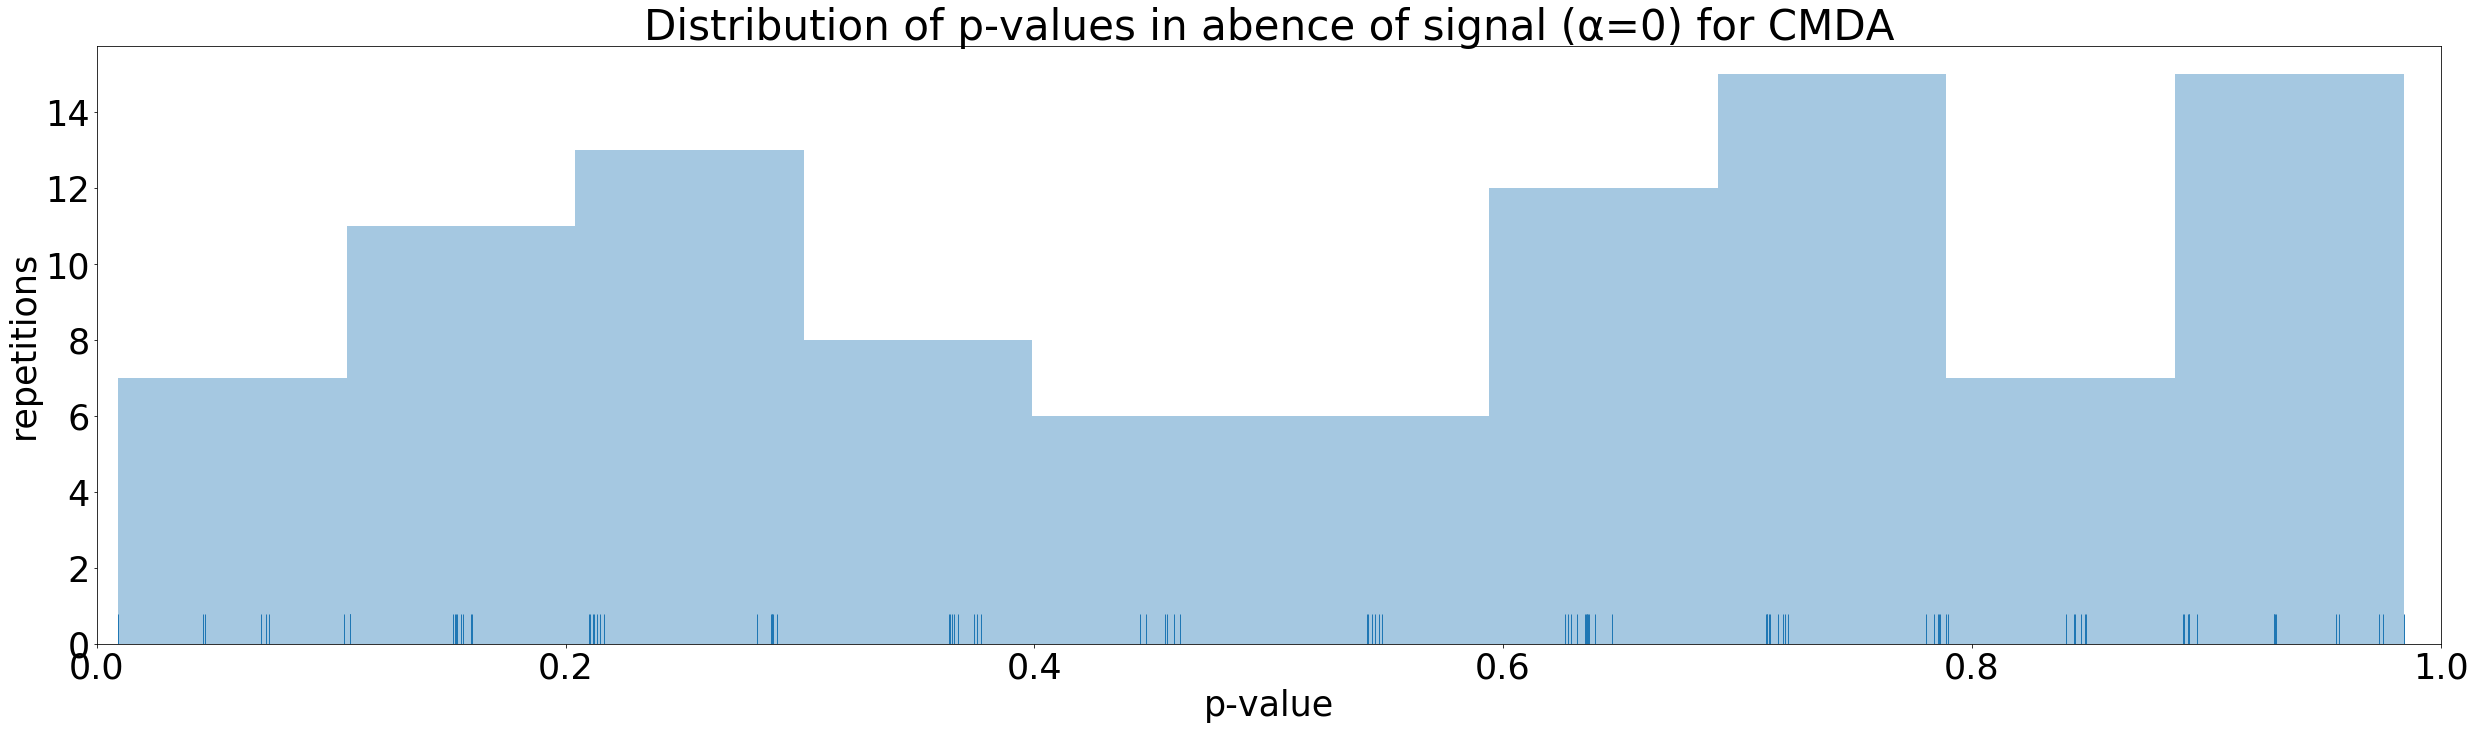

In [15]:
import seaborn as sns
sns.distplot(pvals_decoding[:, 0], bins=10, kde=False, rug=True)
plt.title('Distribution of p-values in abence of signal (α=0) for CMDA')
plt.xlim((0, 1))
plt.xlabel('p-value')
plt.ylabel('repetitions')
plt.savefig('decoding_pvals_dist.pdf')

In [7]:
pvals_cmpt.shape

(6060, 10)